# osmnx
https://github.com/gboeing/osmnx

In [33]:
import osmnx as ox
import networkx as nx

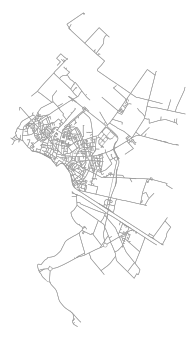

(<Figure size 344.18x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x12baf5a60>)

In [34]:
G = ox.graph_from_place('San Donà di Piave, Veneto, Italia', network_type='drive')
ox.plot_graph(G, node_size=0, edge_linewidth=0.5)

In [35]:
# show some basic stats about the network
ox.basic_stats(G, clean_intersects=True, circuity_dist='euclidean')

{'n': 1762,
 'm': 3992,
 'k_avg': 4.531214528944381,
 'intersection_count': 1371,
 'streets_per_node_avg': 2.6214528944381383,
 'streets_per_node_counts': {0: 0, 1: 391, 2: 11, 3: 1234, 4: 126},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.22190692395005676,
  2: 0.006242905788876277,
  3: 0.7003405221339387,
  4: 0.07150964812712826},
 'edge_length_total': 571613.6150000008,
 'edge_length_avg': 143.18978331663348,
 'street_length_total': 304229.58200000034,
 'street_length_avg': 132.85134585152852,
 'street_segments_count': 2290,
 'node_density_km': None,
 'intersection_density_km': None,
 'edge_density_km': None,
 'street_density_km': None,
 'circuity_avg': 95946.54873258102,
 'self_loop_proportion': 0.00125250501002004,
 'clean_intersection_count': 1,
 'clean_intersection_density_km': None}

In [38]:
G.edges(data=True)

OutMultiEdgeDataView([(490258451, 431884769, {'osmid': 37119093, 'name': 'Via Giuseppe Romita', 'highway': 'residential', 'oneway': False, 'length': 46.099999999999994, 'geometry': <shapely.geometry.linestring.LineString object at 0x11ec53640>}), (490258451, 431883169, {'osmid': 37119093, 'name': 'Via Giuseppe Romita', 'highway': 'residential', 'oneway': False, 'length': 273.647, 'geometry': <shapely.geometry.linestring.LineString object at 0x11ec53be0>}), (490258451, 490258454, {'osmid': 40471493, 'name': 'Via Don Luigi Sturzo', 'highway': 'residential', 'oneway': False, 'length': 253.664, 'geometry': <shapely.geometry.linestring.LineString object at 0x11ec53280>}), (457703443, 457703354, {'osmid': 38646280, 'oneway': True, 'name': 'Via Sabbioni', 'highway': 'residential', 'length': 30.572}), (491446293, 491446305, {'osmid': 40519459, 'oneway': True, 'name': 'Via Madonetta', 'highway': 'unclassified', 'length': 23.169}), (490258454, 490258451, {'osmid': 40471493, 'name': 'Via Don Luig

In [39]:
# get the nearest network node to each point
orig_node = ox.get_nearest_node(G, (45.6308712, 12.590923))
dest_node = ox.get_nearest_node(G, (45, 13))

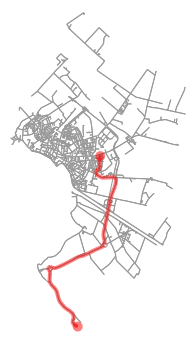

In [40]:
# find the route between these nodes then plot it
route = nx.shortest_path(G, orig_node, dest_node, weight='length')
fig, ax = ox.plot_graph_route(G, route, node_size=0)

In [41]:
# how long is our route in meters?
nx.shortest_path_length(G, orig_node, dest_node, weight='length')

12093.529999999997

In [ ]:
# save graph to disk as shapefile (for GIS) or graphml file (for gephi etc)
ox.save_graph_shapefile(G, filename='mynetwork_shapefile')
ox.save_graphml(G, filename='mynetwork.graphml')